# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [48]:
from scipy import stats 
import numpy as np
import scipy.stats as stats

In [49]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [50]:
print('Mean is %2.1f Sd is %2.1f' % (GPU1.mean(),np.std(GPU1,ddof = 1)))

Mean is 10.3 Sd is 1.2


The null hypothesis states that mean , μ equals 0. The alternative hypthesis states that the mean , μ is not equal 0.

* $H_0$: $\mu$ = 0
* $H_A$: $\mu$  $\neq$  0


Here we select α= 0.05 and it is given that n, sample size = 15.

We do not know the population standard deviation and the sample is not a large sample, n < 30. So you use the t distribution and the $t_STAT$ test statistic.

In [51]:
t_statistic, p_value = stats.ttest_1samp(GPU1, 10.3)
print(t_statistic, p_value)

0.10985884360050992 0.9140805576999014


p value is 0.914 and it is greater than 5% level of significance , we Accept the null hypothesis

## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

* $H_0$: $\mu{GUP1}$ - $\mu{GPU2}$ =      0
* $H_A$: $\mu{GPU1}$ - $\mu{GPU2}$ $\neq$  0


* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are not same.
* The sample is not a large sample, n < 30. So you use the t distribution and the $t_STAT$ test statistic for two sample unpaired test.

### p - value and test statistic

** We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

In [52]:
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU2)
print('P Value %1.3f' % p_value) 

P Value 0.014


 p value is 0.014 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.


## Question 3

He is trying a third GPU - GPU3.

In [53]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [54]:
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU3)
print('P Value %1.3f' % p_value) 

P Value 0.145


 p value is 0.145 and it is greater than 5% level of significance

So the statistical decision is to Accept the null hypothesis at 5% level of significance.


## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn           as sns
e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [56]:

print('Count, Mean and standard deviation e1: %3d, %3.2f and %3.2f' % (len(e1), e1.mean(),np.std(e1,ddof =1)))
print('Count, Mean and standard deviation e2: %3d, %3.2f and %3.2f' % (len(e2), e2.mean(),np.std(e2,ddof =1)))
print('Count, Mean and standard deviation e3: %3d, %3.2f and %3.2f' % (len(e3), e3.mean(),np.std(e3,ddof =1)))

Count, Mean and standard deviation e1:   4, 0.75 and 0.87
Count, Mean and standard deviation e2:   4, 1.70 and 0.67
Count, Mean and standard deviation e3:   4, 0.74 and 0.47


In [57]:
exp_df = pd.DataFrame()

df1            = pd.DataFrame({'exp': '1', 'exp_res':e1})
df2            = pd.DataFrame({'exp': '2', 'exp_res':e2})
df3            = pd.DataFrame({'exp': '3', 'exp_res':e3})

exp_df = exp_df.append(df1) 
exp_df = exp_df.append(df2) 
exp_df = exp_df.append(df3) 

In [58]:
exp_df.head()

,exp,exp_res
0,1,1.59544
1,1,1.41973
2,1,0.00000
3,1,0.00000
0,2,1.43380


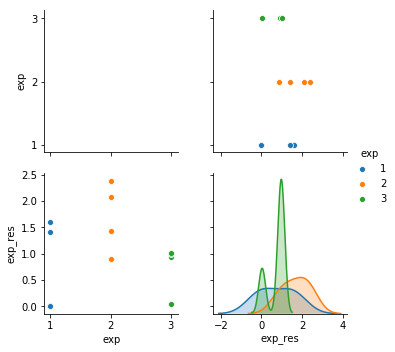

In [59]:
sns.pairplot(exp_df,diag_kind='kde',hue='exp')

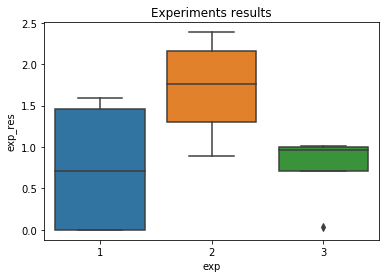

In [60]:
sns.boxplot(x = "exp", y = "exp_res", data = exp_df)
plt.title('Experiments results')
plt.show()

#### The boxplots show  almost dissimilar  shapes, location and spreads and group 3 has an low outlier.

In [97]:
stats.levene(e1, e2)

LeveneResult(statistic=2.502047337898582, pvalue=0.16478397645307163)

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

## null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs

Here we select α = 0.05

In [77]:
test_stat, pval = stats.f_oneway(df1,df2,df3)
pval

array([3.10130032e-287, 6.19880943e-002])

In [79]:
test_stat,pval

(array([9.23589767e+14, 2.97333333e+00]),
 array([3.10130032e-287, 6.19880943e-002]))

In [80]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('exp_res ~ exp', data = exp_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq   df         F    PR(>F)
exp       2.399066  2.0  2.513576  0.135746
Residual  4.294994  9.0       NaN       NaN


p value is 0.135746 and it is greater than our chosen level of signifance at 5%

So the statistical decision is to accept the null hypothesis at 5% level of significance.

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

**Type1 Error**
The first kind of error that is possible involves the rejection of a null hypothesis that is actually true. This kind of error is called a type I error and is sometimes called an error of the first kind.

**Type2 Error**
The second kind of error that is possible occurs when we do not reject a null hypothesis that is false. This sort of error is called a type II error and is also referred to as an error of the second kind.

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


##### Null Hypothesis : There is no significant difference waiting time to place order. which is mean is equal to 4.5.

Alternate Hypothesis : The waiting time to place order is not equal to 4.5

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [61]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a thikereshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [82]:
chi2, p, dof, ex = stats.chi2_contingency(dice, correction=False)

In [85]:
print("chi2 stat:",chi2,"  p-value:",p,"  degree of freedom:",dof,"  contingency:",ex )


chi2 stat: 23.315671914716496   p-value: 0.07766367301496693   degree of freedom: 15   contingency: [[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [92]:
import scipy as scipy

z_scores=stats.zscore(dice)
print('z score:',z_scores)
p_values=scipy.stats.norm.sf(abs(z_scores))
print('p-values:',p_values)

print('mean:',p_values.mean())

z score: [[-0.46291005 -0.18884739 -1.83711731  1.44115338]
 [ 1.38873015 -0.64208114  1.22474487  0.        ]
 [ 0.9258201   0.7176201   0.61237244 -1.44115338]
 [-0.9258201   1.62408759  0.61237244 -0.96076892]
 [-1.38873015  0.03776948  0.          0.        ]
 [ 0.46291005 -1.54854863 -0.61237244  0.96076892]]
p-values: [[0.32171442 0.42510621 0.03309629 0.07477068]
 [0.08245741 0.26041025 0.11033568 0.5       ]
 [0.17726974 0.23649578 0.27014569 0.07477068]
 [0.17726974 0.05217856 0.27014569 0.16833418]
 [0.08245741 0.48493574 0.5        0.5       ]
 [0.32171442 0.06074513 0.27014569 0.16833418]]
mean: 0.23428473233691496


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [93]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

In [96]:
t_statistic, p_value  =  stats.ttest_rel(after, before )
print('P Value %1.3f' % p_value) 

P Value 0.000


(array([ 36.39989357,  89.79738139, 109.34191763, 111.03633983,
         94.15715121, 115.70636506,  97.95388958,  73.07830387,
        131.72811507,  78.63714562,  90.06993942,  48.66993514,
         61.89855558,  99.38298846, 121.5458975 ,  65.36057351,
        107.91669925, 133.1141242 , 106.24839074,  82.08041604,
         86.32645096,  85.46066831,  79.97908572, 144.21837347,
         47.74835815, 147.916338  ,  91.91292516,  49.38204681,
         71.10778361,  82.5901456 , 147.84400439, 117.36997386,
         51.85426409,  60.58633219, 132.6536135 , 103.63184183,
         95.66323092, 119.7079414 ,  76.96795907,  85.12572423,
         37.70979662,  76.08807869,  84.20233602, 115.65496357,
         97.2208034 , 131.40118546,  76.61421901, 148.9018814 ,
        100.50257229,  70.14919554,  77.6262239 ,  99.87204915,
         27.84365737, 104.2273778 , 132.47846502, 131.71567604,
        124.41734281,  50.1304777 ,  38.50660786, 150.10711584,
         55.71073132,  90.83025574, 166.

p value is 0.002 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that there is an effect of drugs on weight loss 